# Softmax Regression

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 파이썬 코드를 재실행해도 같은 결과가 나오도록 random seed를 설정함.
torch.manual_seed(1)

In [7]:
# Model code

class SoftmaxRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(4,3)

  def forward(self, x):
    return self.linear(x)

In [10]:
# Training

x_train = torch.FloatTensor([[6.3, 3.3, 6.0, 2.5],
                             [5.8, 2.7, 5.1, 1.9],
                             [7.1, 3.0, 5.9, 2.1],
                             [5.1, 3.5, 1.4, 0.2],
                             [4.9, 3.0, 1.4, 0.2],
                             [4.7, 3.2, 1.3, 0.2],
                             [7.0, 3.2, 4.7, 1.4],
                             [6.4, 3.2, 4.5, 1.5],
                             [6.9, 3.1, 5.0, 1.6]])

# class 0: virginica, class 1: setosa, class 2: versicolor
y_train = torch.LongTensor([0,0,0,1,1,1,2,2,2])

model = SoftmaxRegression()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)
nb_epochs = 1000
for epoch in range(nb_epochs+1):
  prediction = model(x_train)
  cost = F.cross_entropy(prediction, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    correct_prediction = torch.argmax(prediction, 1) == y_train
    accuracy = correct_prediction.float().mean().item()
    print(f'Epoch {epoch:4d} / {nb_epochs} Cost: {cost.item():.6f} Accuracy: {accuracy*100:2.2f}')

Epoch    0 / 1000 Cost: 2.479935 Accuracy: 33.33
Epoch  100 / 1000 Cost: 0.287630 Accuracy: 100.00
Epoch  200 / 1000 Cost: 0.164817 Accuracy: 100.00
Epoch  300 / 1000 Cost: 0.124258 Accuracy: 100.00
Epoch  400 / 1000 Cost: 0.099796 Accuracy: 100.00
Epoch  500 / 1000 Cost: 0.083411 Accuracy: 100.00
Epoch  600 / 1000 Cost: 0.071668 Accuracy: 100.00
Epoch  700 / 1000 Cost: 0.062840 Accuracy: 100.00
Epoch  800 / 1000 Cost: 0.055961 Accuracy: 100.00
Epoch  900 / 1000 Cost: 0.050450 Accuracy: 100.00
Epoch 1000 / 1000 Cost: 0.045936 Accuracy: 100.00


In [11]:
# Testing
test_data = torch.FloatTensor([[6.3, 2.9, 5.6, 1.8],
                               [6.5, 3.0, 5.8, 2.2],
                               [4.6, 3.1, 1.5, 0.2],
                               [5.0, 3.6, 1.4, 0.2],
                               [5.5, 2.3, 4.0, 1.3],
                               [6.5, 2.8, 4.6, 1.5]])
prediction = F.softmax(model(test_data), dim = 1)
print(prediction)

tensor([[9.4322e-01, 3.5028e-05, 5.6748e-02],
        [9.8191e-01, 7.4342e-06, 1.8083e-02],
        [1.7900e-07, 9.7643e-01, 2.3572e-02],
        [5.2628e-09, 9.9352e-01, 6.4839e-03],
        [2.0849e-01, 7.4503e-03, 7.8406e-01],
        [8.6223e-02, 4.8565e-03, 9.0892e-01]], grad_fn=<SoftmaxBackward0>)


# Softmax Regression for MNIST dataset

In [12]:
# Model code

class MNIST_SoftmaxRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(784, 10)
  def forward(self, x):
    return self.linear(x)

In [14]:
# Library Reference
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random

In [16]:
# trianing

# hyperparameters
training_epochs = 15
batch_size = 100

# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

# dataset loader
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size,
                         shuffle=True)

model = MNIST_SoftmaxRegression()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for idx, (x_train, y_train) in enumerate(data_loader):
    x_train = x_train.view(-1, 28*28)

    prediction = model(x_train)
    cost = criterion(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print(f'Epoch: {epoch+1:04d} cost = {avg_cost:.9f}')
print('Learning finished')

Epoch: 0001 cost = 0.536037326
Epoch: 0002 cost = 0.358905882
Epoch: 0003 cost = 0.330962867
Epoch: 0004 cost = 0.316325516
Epoch: 0005 cost = 0.306863338
Epoch: 0006 cost = 0.300043613
Epoch: 0007 cost = 0.294771910
Epoch: 0008 cost = 0.290302008
Epoch: 0009 cost = 0.287469476
Epoch: 0010 cost = 0.284229100
Epoch: 0011 cost = 0.281752527
Epoch: 0012 cost = 0.279611737
Epoch: 0013 cost = 0.277581096
Epoch: 0014 cost = 0.275908321
Epoch: 0015 cost = 0.274456114
Learning finished


In [17]:
# test model
with torch.no_grad():
  x_test = mnist_test.test_data.view(-1, 28*28).float()
  y_test = mnist_test.targets

  prediction = model(x_test)

  correct_prediction = torch.argmax(prediction, 1) == y_test
  accuracy = correct_prediction.float().mean()
  print(f'Accuracy: {accuracy.item()}')

Accuracy: 0.8801000118255615


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:81: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


Label:  3
Prediction:  3


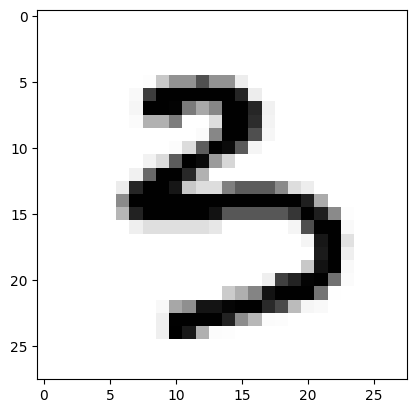

In [18]:
# 무작위 예측
with torch.no_grad():
    r = random.randint(0, len(mnist_test) - 1)
    x_single_data = mnist_test.data[r:r + 1].view(-1, 28 * 28).float()
    y_single_data = mnist_test.targets[r:r + 1]

    print('Label: ', y_single_data.item())
    single_prediction = model(x_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()